# Problem 3: Text Mining The Bible

In [28]:
warnings.filterwarnings("ignore")

In [27]:
import warnings
import pandas as pd
import os
import numpy as np
import scattertext as st
import matplotlib.pyplot as plt
import spacy
from pprint import pprint
from mlxtend.frequent_patterns import apriori
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GMM
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from scipy.spatial.distance import cdist
from mlxtend.frequent_patterns import apriori
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage

Please performe standard text transformations - move all case to lower, remove numbers, remove punctation, remove common stopwords, strip whitespace, and get rid of special characters. You will consider n-grams, co-ocurrances, stemming, and term document matrix.

In [29]:
bible = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/bible_asv.csv")

In [30]:
bible.head()

,Unnamed: 0,field,Testaments,Sections,Books,Chapters,Verses,text
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,In the beginning God created the heavens and t...
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,And the earth was waste and void; and darkness...
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,"And God said, Let there be light: and there wa..."
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,"And God saw the light, that it was good: and G..."
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,"And God called the light Day, and the darkness..."


# Preprocessig

In [32]:
#changing all text to lowercase
bible['text'] = bible['text'].str.lower()
#remove numbers from text
bible.text = bible.text.str.replace('\d+', '')
#remove punctuation
bible['text'] = bible['text'].str.replace('[^\w\s]','')
#removing stopwords
stop = stopwords.words('english')
bible['text'] = bible['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#remove numbers from text
bible.text = bible.text.str.replace('\d+', '')
bible.head()

,Unnamed: 0,field,Testaments,Sections,Books,Chapters,Verses,text
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,beginning god created heavens earth
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,earth waste void darkness upon face deep spiri...
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,god said let light light
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,god saw light good god divided light darkness
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,god called light day darkness called night eve...


# Visualization with Scattertext before vectorization

In [8]:
nlp = spacy.load('en')

In [9]:
#corpus = st.CorpusFromPandas(bible,category_col='Books',text_col='text',nlp=nlp).build()

In [12]:
corpus = st.CorpusFromPandas(bible,category_col='Testaments',text_col='text',nlp=nlp).build()

In [56]:
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['jehovah', 'unto', 'saith', 'shalt', 'spake', 'burntoffering', 'hath', 'thy', 'judah', 'thou']


In [ ]:
bookz = bible.Books.unique()

In [57]:
# This gives us the top 10 most frequent terms in each book of the bible
for x in bookz :
    x=x
    term_freq_df = corpus.get_term_freq_df()
    term_freq_df['Book Score'] = corpus.get_scaled_f_scores(x)
    print("10 most frequent words in", x)
    pprint(list(term_freq_df.sort_values(by='Book Score',ascending=False).index[:10]))


10 most frequent words in gen
['years begat',
 'rebekah',
 'unto joseph',
 'jacob said',
 'laban',
 'leah',
 'abram',
 'lived begat',
 'rachel',
 'joseph said']
10 most frequent words in exod
['twined linen',
 'twined',
 'fine twined',
 'scarlet fine',
 'acacia wood',
 'acacia',
 'purple scarlet',
 'curtain',
 'rings',
 'blue purple']
10 most frequent words in lev
['estimation',
 'pronounce',
 'thy estimation',
 'jubilee',
 'unclean even',
 'priest shall',
 'bathe',
 'goat',
 'wash clothes',
 'leprosy']
10 most frequent words in num
['one silver',
 'helambs year',
 'prince children',
 'families fathers',
 'one ram',
 'helambs',
 'balak',
 'number names',
 'flour mingled',
 'balaam']
10 most frequent words in deut
['giveth thee',
 'shall choose',
 'thy gates',
 'command thee',
 'within thy',
 'land jehovah',
 'jehovah thy',
 'thy god',
 'fruit thy',
 'place jehovah']
10 most frequent words in josh
['border went',
 'joshua said',
 'passed along',
 'reuben children',
 'unto joshua',
 'ai'

In [14]:
Testaments = bible.Testaments.unique()

In [15]:
# This gives us the top 10 most frequent terms in both the new testament and the old testament
for x in Testaments :
    x=x
    term_freq_df = corpus.get_term_freq_df()
    term_freq_df['Book Score'] = corpus.get_scaled_f_scores(x)
    print("10 most frequent words in", x)
    pprint(list(term_freq_df.sort_values(by='Book Score',ascending=False).index[:10]))


10 most frequent words in OT
['jehovah god',
 'jehovah',
 'saith jehovah',
 'unto jehovah',
 'jehovah thy',
 'lord jehovah',
 'jehovah hath',
 'tent',
 'jehovah hosts',
 'word jehovah']
10 most frequent words in NT
['peter',
 'jesus',
 'john',
 'christ',
 'paul',
 'gospel',
 'pharisees',
 'jesus said',
 'church',
 'jesus christ']


In [21]:
html = st.produce_scattertext_explorer(corpus,
category='OT',
category_name='Old Testament',
not_category_name='New Testament',
width_in_pixels=1000)
open("Testament.html", 'wb').write(html.encode('utf-8'))

4491908

Creates interactive scattertext plot comparing the frequencies from the old testament to the new testament look at Testament.html in my github to view a cool interactive plot comparing relative freqency of terms between the New testament and the old testament. The file is large so it takes a while to load. It works best in chrome. 

# Vectorization

In [11]:
#Vectorizes text feature using term frequency-inverse document frequency 
vec = TfidfVectorizer()
X = vec.fit_transform(bible['text'].values.astype('str'))
text = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [12]:
bible = pd.merge(bible, text, left_index=True, right_index=True)
bible = bible.drop('text',axis=1)

In [13]:
bible.head()

,Unnamed: 0,field_x,Testaments,Sections,Books,Chapters,Verses,aaron,aarons,abaddon,...,zophim,zorah,zorathites,zorites,zuar,zuph,zur,zuriel,zurishaddai,zuzim
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
bible.columns

Index(['Unnamed: 0', 'field_x', 'Testaments', 'Sections', 'Books', 'Chapters',
       'Verses', 'aaron', 'aarons', 'abaddon',
       ...
       'zophim', 'zorah', 'zorathites', 'zorites', 'zuar', 'zuph', 'zur',
       'zuriel', 'zurishaddai', 'zuzim'],
      dtype='object', length=12660)

# PCA

In [15]:
X_bible = bible.drop(bible.ix[:,0:7].head(0).columns, axis=1)

In [16]:
X_bible.head()

,aaron,aarons,abaddon,abagtha,abanah,abarim,abase,abased,abasing,abated,...,zophim,zorah,zorathites,zorites,zuar,zuph,zur,zuriel,zurishaddai,zuzim
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
pca = PCA(n_components=2)
pca.fit(X_bible)
X_bible_2PCA = pca.transform(X_bible)

In [17]:
pca = PCA(n_components=200)
pca.fit(X_bible)
X_bible_200PCA = pca.transform(X_bible)

In [17]:
pca = PCA(n_components=1000)
pca.fit(X_bible)
X_bible_1000PCA = pca.transform(X_bible)

# Assosiation with Apriori

# Using Elbow method to determine optimal number of clusters

In [18]:
## Don't run unless you want to wait a about 15 mins.
#distortions = []
#K = range(1,10)
#for k in K:
#    kmeanModel = KMeans(n_clusters=k).fit(X_bible_1000PCA)
#    kmeanModel.fit(X_bible_1000PCA)
#    distortions.append(sum(np.min(cdist(X_bible_1000PCA, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_bible_1000PCA.shape[0])

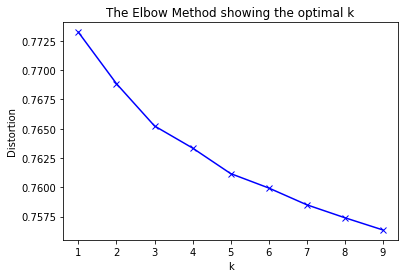

In [19]:
## Don't run or you will lose this pretty graph
#plt.plot(K, distortions, 'bx-')
#plt.xlabel('k')
#plt.ylabel('Distortion')
#plt.title('The Elbow Method showing the optimal k')
#plt.show()

Based on the elbow method the optimal number of clusters looks like 5 or possibly 3

# Comparing BIC and AIC methods to determine optimal number of clusters

In [ ]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(X_bible_200PCA)
          for n in n_components]

plt.plot(n_components, [m.bic(X_bible_200PCA) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_bible_200PCA) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# Visualization with 2 Principle Components 

Number of clusters was chosen as 5 based on the elbow method. 

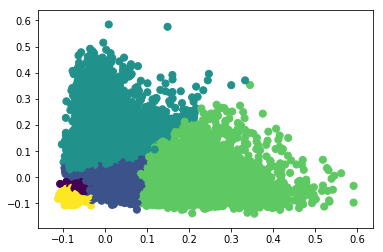

In [20]:
model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_bible_2PCA)
plt.scatter(X_bible_2PCA[:, 0], X_bible_2PCA[:, 1], c=labels,
            s=50, cmap='viridis');

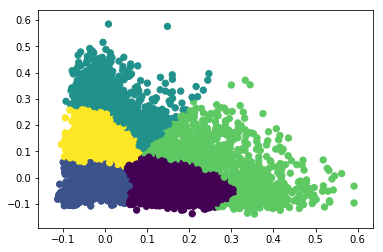

In [39]:
gmm = GMM(n_components=5).fit(X_bible_2PCA)
labels = gmm.predict(X_bible_2PCA)
plt.scatter(X_bible_2PCA[:, 0], X_bible_2PCA[:, 1], c=labels, s=40, cmap='viridis');

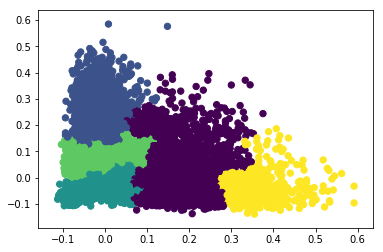

In [22]:
clustering = AgglomerativeClustering(n_clusters=5).fit(X_bible_2PCA)
labels = clustering.labels_
plt.scatter(X_bible_2PCA[:, 0], X_bible_2PCA[:, 1], c=labels, s=40, cmap='viridis')

# Using first 200 Principle Components for analysis

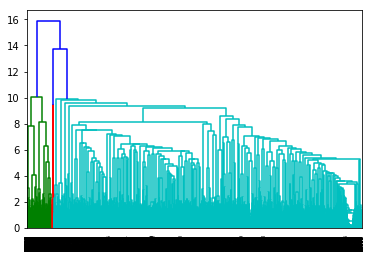

In [117]:
Z = linkage(X_bible_200PCA, 'ward')
dn = dendrogram(Z)

In [ ]:
model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_bible_200PCA)

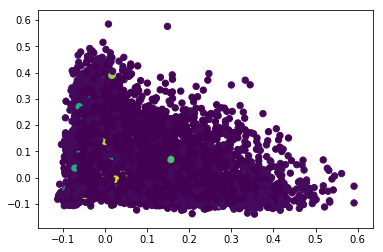

In [17]:
db = DBSCAN(eps=0.3, min_samples=10,metric='cosine').fit(X_bible_200PCA)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.scatter(X_bible_200PCA[:, 0], X_bible_200PCA[:, 1], c=labels, s=40, cmap='viridis')

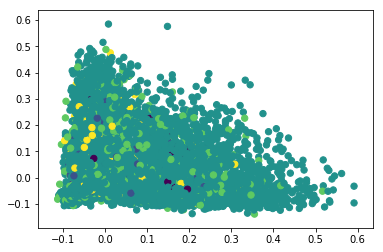

In [19]:
gmm = GMM(n_components=5).fit(X_bible_200PCA)
labels = gmm.predict(X_bible_200PCA)
plt.scatter(X_bible_200PCA[:, 0], X_bible_200PCA[:, 1], c=labels, s=40, cmap='viridis');

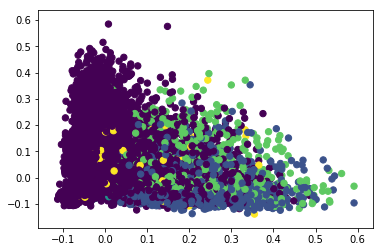

In [20]:
clustering = AgglomerativeClustering(n_clusters=5).fit(X_bible_200PCA)
labels = clustering.labels_
plt.scatter(X_bible_200PCA[:, 0], X_bible_200PCA[:, 1], c=labels, s=40, cmap='viridis')

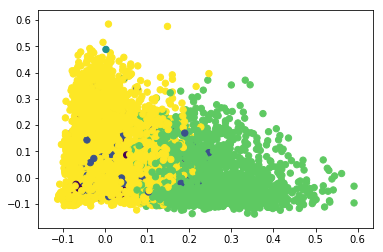

In [18]:
clustering = MiniBatchKMeans(n_clusters=5).fit(X_bible_200PCA)
labels = clustering.labels_
plt.scatter(X_bible_200PCA[:, 0], X_bible_200PCA[:, 1], c=labels, s=40, cmap='viridis')

# Seriation

In [17]:
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

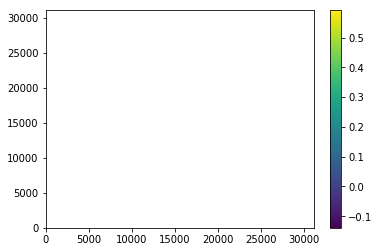

In [18]:
dist_mat = squareform(pdist(X_bible_2PCA))

N = len(X_bible_2PCA)
plt.pcolormesh(X_bible_2PCA)
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

In [ ]:
methods = ["single","average","complete"]
for method in methods:
    print("Method:\t",method)
    
    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat,method)
    
    plt.pcolormesh(ordered_dist_mat)
    plt.xlim([0,N])
    plt.ylim([0,N])
    plt.show()

Method:	 single


# Using Labels from Clustering for Comparison

In [20]:
labels = pd.DataFrame(labels)
labels.columns = ['groupnum']

groupnum    int32
dtype: object

In [22]:
bytypes = pd.merge(bible, labels, left_index=True, right_index=True)
bytypes.head()

,Unnamed: 0,field_x,Testaments,Sections,Books,Chapters,Verses,aaron,aarons,abaddon,...,zorah,zorathites,zorites,zuar,zuph,zur,zuriel,zurishaddai,zuzim,groupnum
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [29]:
group_1 = bytypes[bytypes["groupnum"]==0]
group_2 = bytypes[bytypes["groupnum"]==1]
group_3 = bytypes[bytypes["groupnum"]==2]
group_4 = bytypes[bytypes["groupnum"]==3]
group_5 = bytypes[bytypes["groupnum"]==4]

In [30]:
group_1 = group_1.iloc[:,[2,12660]]
group_2 = group_2.iloc[:,[2,12660]]
group_3 = group_3.iloc[:,[2,12660]]
group_4 = group_4.iloc[:,[2,12660]]
group_5 = group_5.iloc[:,[2,12660]]

In [31]:
group_1_count_OT= group_1[group_1['Testaments'] == 'OT'].count()['Testaments']
group_1_count_NT= group_1[group_1['Testaments'] == 'NT'].count()['Testaments']
group_2_count_OT= group_2[group_2['Testaments'] == 'OT'].count()['Testaments']
group_2_count_NT= group_2[group_2['Testaments'] == 'NT'].count()['Testaments']
group_3_count_OT= group_3[group_3['Testaments'] == 'OT'].count()['Testaments']
group_3_count_NT= group_3[group_3['Testaments'] == 'NT'].count()['Testaments']
group_4_count_OT= group_4[group_4['Testaments'] == 'OT'].count()['Testaments']
group_4_count_NT= group_4[group_4['Testaments'] == 'NT'].count()['Testaments']
group_5_count_OT= group_5[group_5['Testaments'] == 'OT'].count()['Testaments']
group_5_count_NT= group_5[group_5['Testaments'] == 'NT'].count()['Testaments']

In [32]:
d = {'group': ["1 Old","1 New","group_2_count_OT","group_2_count_NT","group_3_count_OT","group_3_count_NT","group_4_count_OT","group_4_count_NT","group_5_count_OT","group_5_count_NT"],'count': [group_1_count_OT,group_1_count_NT,group_2_count_OT,group_2_count_NT,group_3_count_OT,group_3_count_NT,group_4_count_OT,group_4_count_NT,group_5_count_OT,group_5_count_NT]}

In [ ]:
df= pd.DataFrame(data=d)
df.sort_values(by = 'count',ascending= False)


Above you can see a table comparing the groupings for the New and Old testament into the clusters based off of which Testament they fall into. 

In [23]:
section = bytypes.Sections.unique()
clusts = bytypes.groupnum.unique()

In [25]:
first = []
second = []
third = []

for x in section :
    x=x
    for j in clusts :
        j=j
        a = bytypes[bytypes["groupnum"]== j]
        b = a[a['Sections'] == x].count()['Sections']
        
        first.append({x})
        second.append({j})
        third.append({b})

In [26]:
first = pd.DataFrame(first)
first.columns = ['Section']
second = pd.DataFrame(second)
second.columns = ['Cluster']
third = pd.DataFrame(third)
third.columns = ['Count']

df2 = pd.merge(first, second, left_index=True, right_index=True)
df2 = pd.merge(df2, third, left_index=True, right_index=True)
df2.sort_values(by = 'Count', ascending= False)

,Section,Cluster,Count
5,History,4,5701
0,Law,4,4363
15,Prophets,4,4207
20,Gospels,4,4080
10,Wisdom,4,3132
25,Paul,4,1751
30,Apostles,4,985
2,Law,3,959
12,Wisdom,3,848
17,Prophets,3,731


Above is a table comparing each section of the bible and its corresponding group based off of the previously completed clustering analysis.  